In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

## Simple Linear Regression

A straight forward approach for predicting a quantitative response $Y$ on the basis of a single predictor variable $X$.

Assumes there is approximately a linear relationship between $X$ and $Y$:

$Y \approx \beta_0 + \beta_1*X$

$\beta_0 \text{: intercept}$  
$\beta_1 \text{: slope}$  

Together $\beta_0$ and $\beta_1$ are known as parametars or coefficients. Once we have used training data to produce estimates of $\hat{\beta_0}$ and $\hat{\beta_1}$, can predict future values of $\hat{y}$ on the basis of $x$.

### Estimating parameters

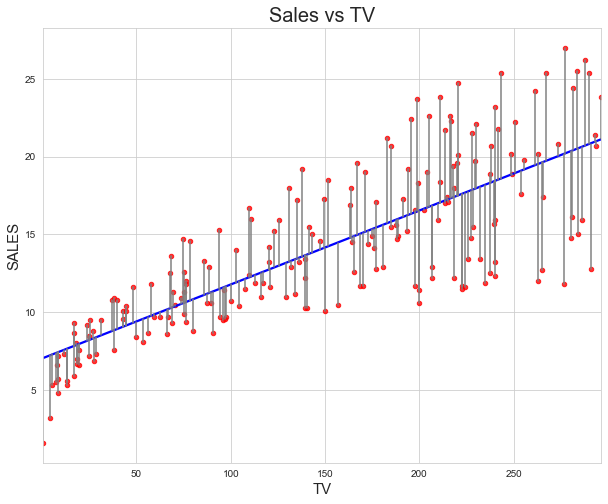

In [54]:
advertising = pd.read_csv("http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv")

fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(1, 1, 1)

sns.regplot(
    x=advertising["TV"],
    y=advertising["sales"],
    ci=None,
    scatter_kws={'color':'r', 's':20},
    color="blue"
)

for i in range(len(advertising["TV"])):
    plt.plot(
        [advertising["TV"][i], advertising["TV"][i]],
        [advertising["sales"][i], 7.0326+0.0475*advertising["TV"][i]],
    color='grey'
)


ax.set_xlabel("TV", fontsize=15)
ax.set_ylabel("SALES", fontsize=15)
ax.set_title("Sales vs TV", fontsize=20)

plt.show()

Assuming there is a linear relationship between Sales and TV we can represent Sales as:
  
$\text{SALES}=\beta_0 + \beta_1 * \text{TV}$
  
Our goal is to estimate $\hat{\beta_0}$, the intercept, and $\hat{\beta_1}$, the slope that fits the data the best. The most common approach is the least square criterion. Essentially, create a blue line that minimises the distance of the squared grey lines. More formally:  
  

$\displaystyle{\min_{\hat{\beta_0}, \hat{\beta_1}}\sum_{i=1}^{n}(y_i-\hat{\beta_0} - \hat{\beta_1}x_i)^2}$

### Estimating parameters with Ordinary Least Squares (OLS) and Statsmodel API
  
$\hat{\beta_1 }= \frac{\sum{(x_i-\overline{x})(y_i-\overline{y})}}{\sum{(x_i-\overline{x})^2}}$  
  
$\hat{\beta_0} = \overline{y}-\hat{\beta_1}*\overline{x}$

In [55]:
import statsmodels.api as sm

Y = advertising["sales"]
X = advertising[["TV"]]

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 08 Jun 2020   Prob (F-statistic):           1.47e-42
Time:                        20:11:05   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0